In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import tsgm
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import LSTM, Dense

import keras


In [2]:
df = pd.read_csv("NewTestDataCompiled.csv")
print(df)
df.columns = ['AmplitudePrimary', 'AmplitudeSecondary', 'Latency', "CorrectiveSaccade", "Normal"]
display(df)
df["Normal"].value_counts()



             0         1         2     3    4
0     7.905335  0.907229  0.124998   7.0  0.0
1    17.381435  0.563108  0.341670  13.0  0.0
2    29.415535  1.097195  0.308346  16.0  0.0
3    10.173487  1.182019  0.175026   9.0  0.0
4     6.801426  7.733378  0.391700  28.0  0.0
..         ...       ...       ...   ...  ...
238  10.272048  1.115520  0.275021  10.0  1.0
239  23.646621  6.660983  0.000025  16.0  1.0
240   6.281954  0.400970  0.091699  15.0  1.0
241   9.421117  0.646527  0.041703  30.0  1.0
242  17.369912  1.652808  0.091714  34.0  1.0

[243 rows x 5 columns]


,AmplitudePrimary,AmplitudeSecondary,Latency,CorrectiveSaccade,Normal
0,7.905335,0.907229,0.124998,7.0,0.0
1,17.381435,0.563108,0.341670,13.0,0.0
2,29.415535,1.097195,0.308346,16.0,0.0
3,10.173487,1.182019,0.175026,9.0,0.0
4,6.801426,7.733378,0.391700,28.0,0.0
...,...,...,...,...,...
238,10.272048,1.115520,0.275021,10.0,1.0
239,23.646621,6.660983,0.000025,16.0,1.0
240,6.281954,0.400970,0.091699,15.0,1.0
241,9.421117,0.646527,0.041703,30.0,1.0


Normal
0.0    137
1.0    106
Name: count, dtype: int64

# No Data Augmentation

In [3]:
y = df.Normal
X = df.drop('Normal', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

### Logsitic Regression

In [4]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6122448979591837
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.89      0.72        28
         1.0       0.62      0.24      0.34        21

    accuracy                           0.61        49
   macro avg       0.62      0.57      0.53        49
weighted avg       0.62      0.61      0.56        49



In [5]:
display(y_pred)
display(y_test)
print(len(y_pred))

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

126    0.0
103    0.0
52     0.0
87     0.0
37     0.0
187    1.0
139    1.0
215    1.0
116    0.0
128    0.0
151    1.0
178    1.0
74     0.0
2      0.0
145    1.0
107    0.0
140    1.0
71     0.0
131    0.0
92     0.0
106    0.0
163    1.0
1      0.0
20     0.0
213    1.0
32     0.0
63     0.0
29     0.0
121    0.0
199    1.0
188    1.0
141    1.0
226    1.0
137    1.0
150    1.0
159    1.0
237    1.0
102    0.0
23     0.0
214    1.0
183    1.0
236    1.0
99     0.0
14     0.0
21     0.0
59     0.0
231    1.0
136    0.0
118    0.0
Name: Normal, dtype: float64

49


### Random Forest

In [6]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 300, min_samples_leaf = 4, min_samples_split = 10)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6326530612244898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69        28
         1.0       0.58      0.52      0.55        21

    accuracy                           0.63        49
   macro avg       0.62      0.62      0.62        49
weighted avg       0.63      0.63      0.63        49



In [7]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.5157894736842106


### SVM 

In [8]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 0.1, 'gamma': 1}
Best Score: 0.561808367071525


In [9]:
model = SVC(kernel='rbf', random_state=42, C = 0.1, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73        28
         1.0       0.00      0.00      0.00        21

    accuracy                           0.57        49
   macro avg       0.29      0.50      0.36        49
weighted avg       0.33      0.57      0.42        49



/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanmatichoudhary/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

### simple neural network

In [12]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
39/39 [==============================] - 1s 5ms/step - loss: 0.7638 - accuracy: 0.5871 - val_loss: 0.8197 - val_accuracy: 0.4615
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.6129 - val_loss: 0.8732 - val_accuracy: 0.4359
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6129 - val_loss: 0.9165 - val_accuracy: 0.4359
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.6000 - val_loss: 0.8597 - val_accuracy: 0.4359
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.5677 - val_loss: 0.8864 - val_accuracy: 0.4359
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.6065 - val_loss: 0.7742 - val_accuracy: 0.5128
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6452 - val_loss: 0.7759 - val_accuracy: 0.4615
Epoch 8/50
39/39 [==

# Data Augmentation: Gaussain Noise 

In [29]:
def add_gaussian_noise(X, mean=0, std=0.1):
    noise = np.random.normal(mean, std, size=X.shape)
    return X + noise
# Example: Adding Gaussian noise with mean=0 and std=0.1
X_with_gaussian_noise = add_gaussian_noise(X)
X_augmented = pd.concat([X, X_with_gaussian_noise])
y_augmented = pd.concat([y,y])
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42, stratify = y_augmented)




### Logisitic Reg

In [14]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5816326530612245
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.75      0.67        55
         1.0       0.53      0.37      0.44        43

    accuracy                           0.58        98
   macro avg       0.57      0.56      0.55        98
weighted avg       0.57      0.58      0.57        98



In [15]:
display(y_pred)
display(y_test)
print(len(y_pred))
print(y_test.value_counts())

array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.])

175    1.0
172    1.0
144    1.0
58     0.0
103    0.0
      ... 
14     0.0
176    1.0
224    1.0
91     0.0
221    1.0
Name: Normal, Length: 98, dtype: float64

98
Normal
0.0    55
1.0    43
Name: count, dtype: int64


### RF

In [16]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7629037629037629


In [30]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 100, min_samples_leaf = 1, min_samples_split = 2)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7857142857142857
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82        55
         1.0       0.79      0.70      0.74        43

    accuracy                           0.79        98
   macro avg       0.79      0.78      0.78        98
weighted avg       0.79      0.79      0.78        98



### SVM 

In [18]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 1}
Best Score: 0.8634698634698635


In [19]:
model = SVC(kernel='rbf', random_state=42, C = 10, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9387755102040817
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        55
         1.0       0.95      0.91      0.93        43

    accuracy                           0.94        98
   macro avg       0.94      0.94      0.94        98
weighted avg       0.94      0.94      0.94        98



### simple neural network

In [20]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
78/78 [==============================] - 1s 3ms/step - loss: 0.7354 - accuracy: 0.5290 - val_loss: 0.6694 - val_accuracy: 0.5897
Epoch 2/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.6000 - val_loss: 0.6322 - val_accuracy: 0.6154
Epoch 3/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.5935 - val_loss: 0.6333 - val_accuracy: 0.6154
Epoch 4/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6768 - accuracy: 0.5806 - val_loss: 0.6472 - val_accuracy: 0.5513
Epoch 5/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.6000 - val_loss: 0.6463 - val_accuracy: 0.5641
Epoch 6/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.6065 - val_loss: 0.6327 - val_accuracy: 0.5256
Epoch 7/50
78/78 [==============================] - 0s 1ms/step - loss: 0.7075 - accuracy: 0.5548 - val_loss: 0.6496 - val_accuracy: 0.6154
Epoch 8/50
78/78 [==

# Data Augmentation: Jittering

In [31]:
def add_jittering(X, magnitude=0.1):
    jitter = np.random.uniform(-magnitude, magnitude, size=X.shape)
    return X + jitter

# Example: Adding jittering with magnitude=0.1
X_with_jittering = add_jittering(X)

X_augmented = pd.concat([X, X_with_jittering])
y_augmented = pd.concat([y,y])
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42, stratify = y_augmented)



### Logisitic Reg

In [22]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.73      0.66        55
         1.0       0.52      0.37      0.43        43

    accuracy                           0.57        98
   macro avg       0.56      0.55      0.54        98
weighted avg       0.56      0.57      0.56        98



### RF

In [23]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7888444888444888


In [32]:
model = RandomForestClassifier(random_state=42, max_depth = None, n_estimators = 200, min_samples_leaf = 1, min_samples_split = 2)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7857142857142857
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        55
         1.0       0.75      0.77      0.76        43

    accuracy                           0.79        98
   macro avg       0.78      0.78      0.78        98
weighted avg       0.79      0.79      0.79        98



### SVM

In [25]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001]   # Kernel coefficient for 'rbf' and 'poly' kernels
#     'kernel': ['rbf', 'poly', 'linear']  # Kernel type
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 1}
Best Score: 0.8609057609057608


In [26]:
model = SVC(kernel='rbf', random_state=42, C = 10, gamma = 1)  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9387755102040817
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        55
         1.0       0.95      0.91      0.93        43

    accuracy                           0.94        98
   macro avg       0.94      0.94      0.94        98
weighted avg       0.94      0.94      0.94        98



### simple neural network 

In [27]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
78/78 [==============================] - 1s 3ms/step - loss: 0.7544 - accuracy: 0.5419 - val_loss: 0.7004 - val_accuracy: 0.4872
Epoch 2/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5129 - val_loss: 0.7207 - val_accuracy: 0.5769
Epoch 3/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6129 - val_loss: 0.6829 - val_accuracy: 0.5513
Epoch 4/50
78/78 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.5839 - val_loss: 0.6811 - val_accuracy: 0.5641
Epoch 5/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6701 - accuracy: 0.5871 - val_loss: 0.6645 - val_accuracy: 0.6154
Epoch 6/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5903 - val_loss: 0.6438 - val_accuracy: 0.6410
Epoch 7/50
78/78 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.5548 - val_loss: 0.6364 - val_accuracy: 0.6282
Epoch 8/50
78/78 [==

# Data Augmentation: GAN

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Generator network
def build_generator(latent_dim, num_features):
    model = keras.Sequential([
    layers.Dense(512, activation='relu', input_dim=latent_dim),  # Increase the number of neurons and depth
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),  # Increase the number of neurons and depth
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),  # Increase the number of neurons and depth
    layers.BatchNormalization(),
    layers.Dense(num_features, activation='sigmoid')
    ])
    return model

def build_discriminator(num_features):
    model = keras.Sequential([
        layers.Dense(1024, activation='relu', input_dim=num_features),  # Increase the number of neurons and depth
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),  # Increase the number of neurons and depth
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),  # Increase the number of neurons and depth
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.Sequential([generator, discriminator])
    return model

# Training GAN
def train_gan(generator, discriminator, gan, X_train, y_train, latent_dim, num_epochs=100, batch_size=32, logging_interval=1000, convergence_threshold=0.1, convergence_patience=5):
    best_discriminator_loss = float('inf')
    best_generator_loss = float('inf')
    patience_counter = 0
    
    for epoch in range(num_epochs):
        # Generate fake samples
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_data = generator.predict(noise)
        
        # Select a random batch of real samples
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_samples = X_train.iloc[idx]
        
        # Concatenate real and fake samples
        X = np.concatenate([real_samples, generated_data])
        
        # Labels for real and fake samples
        y_real = np.ones((batch_size, 1))
        y_fake = np.zeros((batch_size, 1))
        y = np.concatenate([y_real, y_fake])
        
        # Train discriminator
        discriminator_loss = discriminator.train_on_batch(X, y)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = gan.train_on_batch(noise, y_real)
        
        # Logging
        if epoch % logging_interval == 0:
            print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")
        
        # Convergence monitoring
        if discriminator_loss < best_discriminator_loss - convergence_threshold and generator_loss < best_generator_loss - convergence_threshold:
            best_discriminator_loss = discriminator_loss
            best_generator_loss = generator_loss
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= convergence_patience:
            print(f"Convergence reached at epoch {epoch}")
            break

# Train GAN with convergence monitoring

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Generate synthetic samples
def generate_samples(generator, latent_dim, num_samples):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated_data = generator.predict(noise)
    return generated_data

# Load data
# Assuming your DataFrame is named df, and the target column is named 'abnormal'
# Drop the target column to get the feature data
# X = df.drop(columns=['normal']).values
# y = df['normal'].values.reshape(-1, 1)

# Split the data into training and testing sets

# Parameters
latent_dim = 100
num_features = X_train.shape[1]

# Build and compile models
generator = build_generator(latent_dim, num_features)
discriminator = build_discriminator(num_features)
gan = build_gan(generator, discriminator)
optimizer = Adam(learning_rate=0.0001)
discriminator.compile(optimizer=optimizer, loss='binary_crossentropy')
# discriminator.compile(optimizer='adam', loss='binary_crossentropy')
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Train GAN
train_gan(generator, discriminator, gan, X_train, y_train, latent_dim)

# Generate samples
generated_samples = generate_samples(generator, latent_dim, 1000)

# Plot generated samples
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', alpha=0.5, label='Real Data')
# plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='red', alpha=0.5, label='Generated Data')
# plt.legend()
# plt.show()

display(generated_samples)


1/1 [==============================] - 0s 120ms/step
Epoch: 0, Discriminator Loss: 1.10200035572052, Generator Loss: 0.7080536484718323
1/1 [==============================] - 0s 16ms/step
Convergence reached at epoch 5
32/32 [==============================] - 0s 3ms/step


array([[0.6430389 , 0.6771423 , 0.535782  , 0.7308327 ],
       [0.5367808 , 0.69522125, 0.4649643 , 0.5994012 ],
       [0.5446434 , 0.63275045, 0.5776892 , 0.5430426 ],
       ...,
       [0.38131785, 0.68380517, 0.62612456, 0.59357923],
       [0.7099702 , 0.5507871 , 0.4482064 , 0.54742175],
       [0.6267307 , 0.61751765, 0.5221946 , 0.68012416]], dtype=float32)

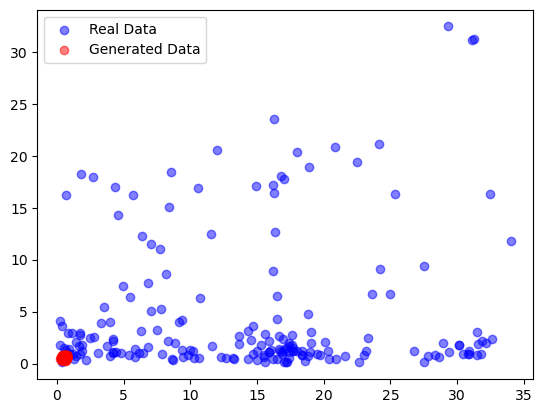

In [34]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', alpha=0.5, label='Real Data')
plt.scatter(generated_samples[:, 0], generated_samples[:, 1], color='red', alpha=0.5, label='Generated Data')
plt.legend()
plt.show()